<a href="https://colab.research.google.com/github/kodywebe/kody-bagel-soyunpar/blob/main/FinalFewShotLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2


NameError: ignored

In [ ]:
!pip install --quiet --user "torch>=1.6, <1.9" "lightning-bolts" "pytorch-lightning>=1.3" "torchmetrics>=0.3" "torchvision" "torchtext" "torchaudio"

     |████████████████████████████████| 804.1 MB 2.8 kB/s 
     |████████████████████████████████| 316 kB 54.7 MB/s 
     |████████████████████████████████| 584 kB 65.0 MB/s 
     |████████████████████████████████| 409 kB 60.5 MB/s 
     |████████████████████████████████| 136 kB 62.5 MB/s 
     |████████████████████████████████| 596 kB 46.0 MB/s 
     |████████████████████████████████| 1.1 MB 51.3 MB/s 
     |████████████████████████████████| 21.0 MB 1.3 MB/s 
     |████████████████████████████████| 23.2 MB 1.3 MB/s 
     |████████████████████████████████| 23.3 MB 560 kB/s 
     |████████████████████████████████| 23.3 MB 1.4 MB/s 
     |████████████████████████████████| 22.1 MB 1.3 MB/s 
     |████████████████████████████████| 22.1 MB 389 kB/s 
     |████████████████████████████████| 17.4 MB 25.8 MB/s 
     |████████████████████████████████| 8.0 MB 32.3 MB/s 
     |████████████████████████████████| 8.0 MB 20.9 MB/s 
     |████████████████████████████████| 8.0 MB 21.8 MB/s 
     |██████

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import os
from tqdm import tqdm
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd 'drive'

/content/drive


In [ ]:
%cd 'MyDrive'

/content/drive/MyDrive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Getting the train images and rescaling
image_folder = '/content/drive/MyDrive/OCT2/Images/IRDs/'
image_generator = ImageDataGenerator(rescale=1./255, width_shift_range=0.2, height_shift_range=0.2,
                                      shear_range=0.2, zoom_range=0.2).flow_from_directory(image_folder, shuffle=False, class_mode='binary', target_size=(310,380), batch_size=10)

Found 649 images belonging to 3 classes.


In [ ]:
# checking the labels
image_generator.class_indices

{'central': 0, 'excluded central': 1, 'extensive': 2}

In [ ]:
# getting the list of filenames for the images
train_image_files = pd.Series(image_generator.filenames)


# Check images

In [ ]:
img1 = cv.imread('/content/drive/MyDrive/OCT2/Images/IRDs/central/CHEN_YOUQIN__B2001130123_19860612_Female_HD Radial_20200113104355_OD_20200619152027.jpeg')

print(type(img1))
# <class 'numpy.ndarray'>

print(img1.shape)


<class 'numpy.ndarray'>
(786, 1180, 3)


(786, 1180, 3)


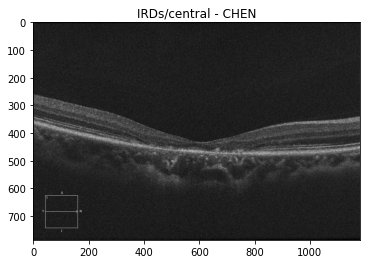

(786, 1180, 3)


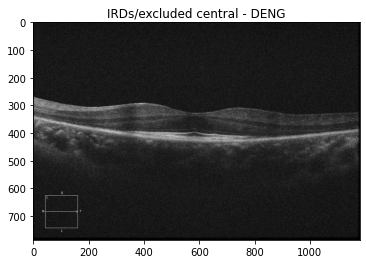

(786, 1180, 3)


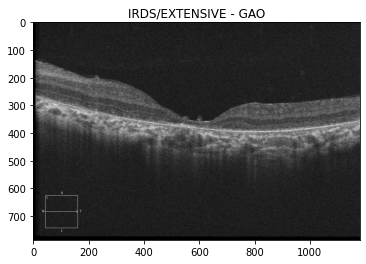

(786, 1180, 3)


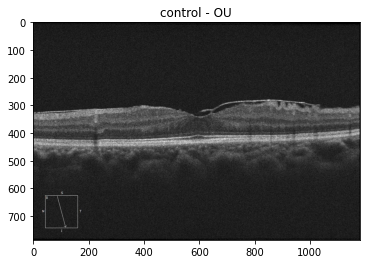

(786, 1180, 3)


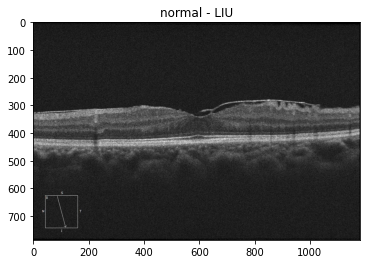

In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv

# IRDs/Central
img1 = cv.imread('/content/drive/MyDrive/OCT2/Images/IRDs/central/CHEN_YOUQIN__B2001130123_19860612_Female_HD Radial_20200113104355_OD_20200619152027.jpeg')
print(img1.shape)
plt.imshow(img1)
plt.title('IRDs/central - CHEN')
plt.show()

# IRDs/Excluded central 
img2 = cv.imread('/content/drive/MyDrive/OCT2/Images/IRDs/excluded central/DENG_SHUOYANG__B1901220088_19921221_Male_HD Radial_20190122090340_OS_20200805171244.jpeg')
print(img2.shape)
plt.imshow(img2)
plt.title('IRDs/excluded central - DENG')
plt.show()

# IRDs/Extensive
img3 = cv.imread('/content/drive/MyDrive/OCT2/Images/IRDs/extensive/GAO_YONGFENG__B190705049_19930724_Male_HD Radial_20190705090019_OS_20200624075404.jpeg')
print(img3.shape)
plt.imshow(img3)
plt.title('IRDS/EXTENSIVE - GAO')
plt.show()

# Control
img4 = cv.imread('/content/drive/MyDrive/OCT2/Images/control/OU_YALI__B2001150153_19620218_Female_HD Radial_20200115112419_OS_20200619154413.jpeg')
print(img4.shape)
plt.imshow(img4)
plt.title('control - OU')
plt.show()

# Normal
img5 = cv.imread('/content/drive/MyDrive/OCT2/Images/normal/liu_xin__008_19910101_Female_HD Radial_20170406170926_OD_20200624160618.jpeg')
print(img5.shape)
plt.imshow(img4)
plt.title('normal - LIU')
plt.show()

In [ ]:
class_names = ['normal', 'control', 'IRDs/excluded central','IRDs/central','IRDs/extensive']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (786, 1180)   
IMAGE_SIZE2 = (224, 224)

In [ ]:
from skimage import io

#img = io.imread(file_path)

def load_data():    
    datasets = ['/content/drive/MyDrive/OCT2/Images']
    out_images = []
    out_labels = []
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        labelledImages = []
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):

            loopList = []
            for _, dirnames, filenames in os.walk(os.path.join(dataset, folder)):
                if len(dirnames)==0:
                    loopList.append(folder)
                    label = class_names_label[folder]
                    break
                for subDirectory in dirnames:
                    loopList.append(os.path.join(folder,subDirectory))
                    label = class_names_label[folder+'/'+subDirectory]
                break

            for dir in loopList:
                # Iterate through each image in our folder
                for file in tqdm(os.listdir(os.path.join(dataset, dir))):
                    # Get the path name of the image
                    img_path = os.path.join(os.path.join(dataset, dir), file)
                    # Open and resize the img
                    image = cv2.imread(img_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, IMAGE_SIZE2) 
                    # Append the image and its corresponding label to the output
                    images.append(image)
                    labels.append(label)
                    labelledImages.append({'image': image, 'label': label})
 
        print("Creating images")
        images = np.array(images, dtype = 'uint8')
        # images = np.array(images)
        # images = images.astype(np.float64)
        # images = 255 * images
        # images = images.astype(np.uint8)
        print("Creating array")
        labels = np.array(labels, dtype = 'uint8') 
        # labels = np.array(labels) 
        # labels = labels.astype(np.float64)
        # labels = 255 * labels
        # labels = labels.astype(np.uint8)  
        print("Appending")
        # output.append((images, labels))
        out_images.append(images)
        out_labels.append(labels)

    return out_images, out_labels

In [ ]:
train_data, train_labels = load_data()
train_data = train_data[0]#.reshape(-1,3,224,224)
train_labels = train_labels[0]


Loading /content/drive/MyDrive/OCT2/Images


100%|██████████| 209/209 [00:03<00:00, 54.41it/s]


Creating images
Creating array
Appending


In [ ]:
train_data.shape

(1128, 224, 224, 3)

In [ ]:
len(train_data)
train_list = []
label_list = []
for val in train_data:
  train_list.append(val)

for val in train_labels:
  label_list.append(val)

train_tensor = torch.Tensor(train_list)
label_tensor = torch.Tensor(label_list)
dataset = TensorDataset(train_tensor, label_tensor)
batch_size = 16
train_dl = DataLoader(dataset, batch_size, shuffle=True, num_workers=3, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 10, kernel_size=5)
#         self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
#         self.conv2_drop = nn.Dropout2d()
#         self.fc1 = nn.Linear(320, 50)
#         self.fc2 = nn.Linear(50, 10)

#     def forward(self, x):
#         x = F.relu(F.max_pool2d(self.conv1(x), 2))
#         x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
#         x = x.view(-1, 320)
#         x = F.relu(self.fc1(x))
#         x = F.dropout(x, training=self.training)
#         x = self.fc2(x)
#         return F.log_softmax(x)
# n_epochs = 3
# train_losses = []
# train_counter = []
# test_losses = []
# test_counter = [i*len(train_dl.dataset) for i in range(n_epochs + 1)]
# network = Net()
# optimizer = optim.SGD(network.parameters(), lr=0.001,
#                       momentum=0.5)
# def train(epoch):
#   network.train()
#   for batch_idx, (data, target) in enumerate(train_dl):
#     optimizer.zero_grad()
#     output = network(data)
#     print(output.shape)
#     print(target.shape)
#     loss = F.nll_loss(output, target)
#     loss.backward()
#     optimizer.step()
#     if batch_idx % log_interval == 0:
#       print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
#         epoch, batch_idx * len(data), len(train_dl.dataset),
#         100. * batch_idx / len(train_dl), loss.item()))
#       train_losses.append(loss.item())
#       train_counter.append(
#         (batch_idx*64) + ((epoch-1)*len(train_dl.dataset)))
#       # torch.save(network.state_dict(), '/results/model.pth')
#       # torch.save(optimizer.state_dict(), '/results/optimizer.pth')
# train(3)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([2809, 10])
torch.Size([16])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


ValueError: ignored

In [ ]:
!pip install easyfsl
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import transforms as T
from torchvision.datasets import Omniglot
from torch.utils.data import Dataset
from torchvision.models import resnet18
from tqdm import tqdm

from easyfsl.samplers import TaskSampler
from easyfsl.utils import plot_images, sliding_average

In [ ]:
image_size = (224,224)
# DATA_DIR = '/content/drive/MyDrive/OCT2/Images'
# X_train = np.load(DATA_DIR)
# print(f"Shape of training data: {X_train.shape}")
# print(f"Data type: {type(X_train)}")
class XrayDataset(Dataset):
    def __init__(self, X, y):
        'Initialization'
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        # Select sample
        image = self.X[index]
        X = self.transform(image)
        y = self.y[index]
        return X, y
    
    transform = T.Compose([
        T.ToPILImage(),
        T.Resize(image_size),
        transforms.Grayscale(num_output_channels=3),
        transforms.RandomResizedCrop(image_size),
        transforms.RandomHorizontalFlip(),
        T.ToTensor()])
    
batch_size = 16
transformed_dataset = XrayDataset(X=train_data, y=train_labels)
for x, y in transformed_dataset:
  print(x)
  print(y)
  print(x.shape)
  print(y.shape)
  break 
train_dl = DataLoader(transformed_dataset, batch_size, shuffle=True, num_workers=3, pin_memory=True)

tensor([[[0.1294, 0.1020, 0.0941,  ..., 0.1020, 0.0980, 0.1176],
         [0.1059, 0.0941, 0.0980,  ..., 0.1098, 0.1098, 0.1255],
         [0.0863, 0.0902, 0.1020,  ..., 0.1176, 0.1255, 0.1294],
         ...,
         [0.1569, 0.1725, 0.1647,  ..., 0.1216, 0.1176, 0.0980],
         [0.1647, 0.1608, 0.1490,  ..., 0.1059, 0.1137, 0.1216],
         [0.1725, 0.1490, 0.1373,  ..., 0.0941, 0.1137, 0.1490]],

        [[0.1294, 0.1020, 0.0941,  ..., 0.1020, 0.0980, 0.1176],
         [0.1059, 0.0941, 0.0980,  ..., 0.1098, 0.1098, 0.1255],
         [0.0863, 0.0902, 0.1020,  ..., 0.1176, 0.1255, 0.1294],
         ...,
         [0.1569, 0.1725, 0.1647,  ..., 0.1216, 0.1176, 0.0980],
         [0.1647, 0.1608, 0.1490,  ..., 0.1059, 0.1137, 0.1216],
         [0.1725, 0.1490, 0.1373,  ..., 0.0941, 0.1137, 0.1490]],

        [[0.1294, 0.1020, 0.0941,  ..., 0.1020, 0.0980, 0.1176],
         [0.1059, 0.0941, 0.0980,  ..., 0.1098, 0.1098, 0.1255],
         [0.0863, 0.0902, 0.1020,  ..., 0.1176, 0.1255, 0.

img shape:  torch.Size([16, 3, 224, 224])


NameError: ignored

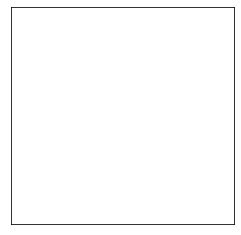

In [ ]:

def show_images(images, nmax=16):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid((images.detach()[:nmax]), nrow=8).permute(0, 1, 2))
def show_batch(dl, nmax=64):
    for (images, labels) in dl:
        print("img shape: ", torch.squeeze(images).shape)
        show_images(torch.squeeze(images), nmax)
        break
show_batch(train_dl)

In [ ]:
# image_size = 28

# # NB: background=True selects the train set, background=False selects the test set
# # It's the nomenclature from the original paper, we just have to deal with it

# train_set = Omniglot(
#     root="./data",
#     background=True,
#     transform=transforms.Compose(
#         [
#             transforms.Grayscale(num_output_channels=3),
#             transforms.RandomResizedCrop(image_size),
#             transforms.RandomHorizontalFlip(),
#             transforms.ToTensor(),
#         ]
#     ),
#     download=True,
# )
# print(type(train_set))
# test_set = Omniglot(
#     root="./data",
#     background=False,
#     transform=transforms.Compose(
#         [
#             # Omniglot images have 1 channel, but our model will expect 3-channel images
#             transforms.Grayscale(num_output_channels=3),
#             transforms.Resize([int(image_size * 1.15), int(image_size * 1.15)]),
#             transforms.CenterCrop(image_size),
#             transforms.ToTensor(),
#         ]
#     ),
#     download=True,
# )

# print(len(test_set))
# print(len(train_set))

In [ ]:
class PrototypicalNetworks(nn.Module):
    def __init__(self, backbone: nn.Module):
        super(PrototypicalNetworks, self).__init__()
        self.backbone = backbone

    def forward(
        self,
        support_images: torch.Tensor,
        support_labels: torch.Tensor,
        query_images: torch.Tensor,
    ) -> torch.Tensor:
        """
        Predict query labels using labeled support images.
        """
        # Extract the features of support and query images
        z_support = self.backbone.forward(support_images)
        z_query = self.backbone.forward(query_images)

        # Infer the number of different classes from the labels of the support set
        n_way = len(torch.unique(support_labels))
        # Prototype i is the mean of all instances of features corresponding to labels == i
        z_proto = torch.cat(
            [
                z_support[torch.nonzero(support_labels == label)].mean(0)
                for label in range(n_way)
            ]
        )

        # Compute the euclidean distance from queries to prototypes
        dists = torch.cdist(z_query, z_proto)

        # And here is the super complicated operation to transform those distances into classification scores!
        scores = -dists
        return scores


convolutional_network = resnet18(pretrained=True)
convolutional_network.fc = nn.Flatten()

model = PrototypicalNetworks(convolutional_network).cuda()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
N_WAY = 5  # Number of classes in a task
N_SHOT = 5  # Number of images per class in the support set
N_QUERY = 10  # Number of images per class in the query set
N_EVALUATION_TASKS = 100

# The sampler needs a dataset with a "get_labels" method. Check the code if you have any doubt!
test_set.get_labels = lambda: [
    instance[1] for instance in test_set._flat_character_images
]
test_sampler = TaskSampler(
    test_set, n_way=N_WAY, n_shot=N_SHOT, n_query=N_QUERY, n_tasks=N_EVALUATION_TASKS
)

test_loader = DataLoader(
    test_set,
    batch_sampler=test_sampler,
    num_workers=12,
    pin_memory=True,
    collate_fn=test_sampler.episodic_collate_fn,
)

In [ ]:
(
    example_support_images,
    example_support_labels,
    example_query_images,
    example_query_labels,
    example_class_ids,
) = next(iter(test_loader))

plot_images(example_support_images, "support images", images_per_row=N_SHOT)
plot_images(example_query_images, "query images", images_per_row=N_QUERY)

In [ ]:
model.eval()
example_scores = model(
    example_support_images.cuda(),
    example_support_labels.cuda(),
    example_query_images.cuda(),
).detach()

_, example_predicted_labels = torch.max(example_scores.data, 1)

print("Ground Truth / Predicted")
for i in range(len(example_query_labels)):
    print(
        f"{test_set._characters[example_class_ids[example_query_labels[i]]]} / {test_set._characters[example_class_ids[example_predicted_labels[i]]]}"
    )

In [ ]:
def evaluate_on_one_task(
    support_images: torch.Tensor,
    support_labels: torch.Tensor,
    query_images: torch.Tensor,
    query_labels: torch.Tensor,
) -> [int, int]:
    """
    Returns the number of correct predictions of query labels, and the total number of predictions.
    """
    return (
        torch.max(
            model(support_images.cuda(), support_labels.cuda(), query_images.cuda())
            .detach()
            .data,
            1,
        )[1]
        == query_labels.cuda()
    ).sum().item(), len(query_labels)


def evaluate(data_loader: DataLoader):
    # We'll count everything and compute the ratio at the end
    total_predictions = 0
    correct_predictions = 0

    # eval mode affects the behaviour of some layers (such as batch normalization or dropout)
    # no_grad() tells torch not to keep in memory the whole computational graph (it's more lightweight this way)
    model.eval()
    with torch.no_grad():
        for episode_index, (
            support_images,
            support_labels,
            query_images,
            query_labels,
            class_ids,
        ) in tqdm(enumerate(data_loader), total=len(data_loader)):

            correct, total = evaluate_on_one_task(
                support_images, support_labels, query_images, query_labels
            )

            total_predictions += total
            correct_predictions += correct

    print(
        f"Model tested on {len(data_loader)} tasks. Accuracy: {(100 * correct_predictions/total_predictions):.2f}%"
    )


evaluate(test_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  7%|▋         | 7/100 [00:17<03:56,  2.54s/it]


KeyboardInterrupt: ignored

In [ ]:
N_TRAINING_EPISODES = 40000
N_VALIDATION_TASKS = 100

train_set.labels = [instance[1] for instance in train_set._flat_character_images]
train_sampler = TaskSampler(
    train_set, n_way=N_WAY, n_shot=N_SHOT, n_query=N_QUERY, n_tasks=N_TRAINING_EPISODES
)
train_loader = DataLoader(
    train_set,
    batch_sampler=train_sampler,
    num_workers=12,
    pin_memory=True,
    collate_fn=train_sampler.episodic_collate_fn,
)

AttributeError: ignored